# Final Project Report

* Class: DS 5100
* Student Name: Max Pearton
* Student Net ID: mjp2da
* This URL: https://github.com/maxpearton/mjp2da_ds5100_montecarlo/blob/main/montecarlo_demo%20.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/maxpearton/mjp2da_ds5100_montecarlo/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
"""
 # montecarlo/montecarlo.py
import numpy as np
import pandas as pd
from typing import List

class Die:
     
    Die class representing a single die with customizable faces and weights.

    Attributes:
    - faces (numpy.ndarray): An array of faces on the die.
    - weights (numpy.ndarray): An array of weights corresponding to the faces.

    Methods:
    - __init__(faces, weights=None): Initializes a Die object with faces and weights.
    - _validate_faces_and_weights(): Validates that faces are distinct and weights are numeric.
    - _validate_face(face): Validates a single face.
    - _validate_weight(weight): Validates a single weight.
    - change_weight(face: str, weight: float): Changes the weight of a specific face.
    - roll(times: int = 1) -> List[str]: Rolls the die a specified number of times.
    - show_state() -> pd.DataFrame: Returns a copy of the die's current state.
    
    def __init__(self, faces, weights=None):
        self.faces = np.array(faces)
        self.weights = np.array(weights) if weights is not None else np.ones_like(self.faces, dtype=float)
        self._validate_faces_and_weights()
        self._die_state = pd.DataFrame({'weights': self.weights}, index=self.faces)
         
        Initializes a Die object with faces and weights.

        Parameters:
        - faces: An array representing distinct faces on the die.
        - weights: An array representing weights corresponding to the faces.
                   If None, all weights are set to 1.0.
        

    def _validate_faces_and_weights(self):
        if len(set(self.faces)) != len(self.faces):
            raise ValueError("Faces must be distinct.")
            
        Validates that faces are distinct and weights are numeric.
        
        if not np.issubdtype(self.weights.dtype, np.number):
            raise TypeError("Weights must be numeric.")

    def _validate_face(self, face):
        if face not in self.faces:
            raise IndexError(f"Invalid face '{face}'.")
        
        Validates a single face.

        Parameters:
        - face: The face to be validated.
        

    def _validate_weight(self, weight):
        if not isinstance(weight, (int, float)) or np.isnan(weight):
            raise TypeError("Weight must be a numeric value.")
        
        Validates a single weight.

        Parameters:
        - weight: The weight to be validated.
        
            
    def change_weight(self, face: str, weight: float):
        if face not in self.faces:
            raise IndexError("Invalid face value.")
        if not np.issubdtype(type(weight), np.number):
            raise TypeError("Weight must be numeric.")
        self.weights[self.faces == face] = weight
        
        Changes the weight of a specific face on the die.

        Parameters:
        - face: The face for which the weight will be changed.
        - weight: The new weight value for the specified face.
        

    def roll(self, times: int = 1) -> List[str]:
        outcomes = np.random.choice(self.faces, times, p=self.weights / np.sum(self.weights))
        return outcomes.tolist()
         
        Rolls the die a specified number of times.

        Parameters:
        - times: The number of times the die will be rolled.

        Returns:
        A list of outcomes from the rolls.
        

    def show_state(self) -> pd.DataFrame:
        return self._die_state.copy()
        
        Returns a copy of the die's current state.

        Returns:
        A DataFrame containing the current weights of each face.
        
class Game:
    
    Game class for simulating the rolling of multiple similar dice.

    Attributes:
    - dice (List[Die]): List of Die objects representing the dice in the game.
    - play_results (pd.DataFrame): DataFrame to store results of the most recent play.

    Methods:
    - __init__(dice: List[Die]): Initializes a Game object with a list of similar dice.
    - play(times: int): Rolls all dice a specified number of times and saves results.
    - show_results(format: str = 'wide') -> pd.DataFrame: Returns a copy of the play results.
    
    def __init__(self, dice: List[Die]):
        self.dice = dice
        self.play_results = None
         
        Initializes a Game object with a list of similar dice.

        Parameters:
        - dice: A list of Die objects representing the dice in the game.
        
            
    def play(self, times: int):
        outcomes = {f'Die_{i+1}': die.roll(times) for i, die in enumerate(self.dice)}
        self.play_results = pd.DataFrame(outcomes)
        
        Rolls all dice a specified number of times and saves results.

        Parameters:
        - times: The number of times all dice will be rolled.
        
        
    def show_results(self, format: str = 'wide') -> pd.DataFrame:
        if format == 'wide':
            return self.play_results.copy()
        elif format == 'narrow':
            return pd.melt(self.play_results, var_name='Die', value_name='Outcome')
        else:
            raise ValueError("Invalid format. Use 'wide' or 'narrow'.")
          
        Returns a copy of the play results in a specified format.

        Parameters:
        - format: The format of the results. 'wide' or 'narrow'.

        Returns:
        A DataFrame containing the play results.
          

class Analyzer:
    
    Analyzer class for computing statistical properties of a Game.

    Attributes:
    - game (Game): Game object for analysis.

    Methods:
    - __init__(game: Game): Initializes an Analyzer object with a Game for analysis.
    - jackpot() -> int: Computes the number of jackpots in the game results.
    - face_counts_per_roll() -> pd.DataFrame: Computes face counts per roll in wide format.
    - combo_count() -> pd.DataFrame: Computes distinct combinations of faces and their counts.
    - permutation_count() -> pd.DataFrame: Computes distinct permutations of faces and their counts.
    
    def __init__(self, game: Game):
        self.game = game
        
        Initializes an Analyzer object with a Game for analysis.

        Parameters:
        - game: A Game object for analysis.
        

    def jackpot(self) -> int:
        results = self.game.show_results()
        print("Results:")
        print(results)

        jackpot_count = (results.apply(lambda row: row.nunique() == 1, axis=1)).sum()
        print("Jackpot Count:")
        print(jackpot_count)

        return jackpot_count
        
        Computes the number of jackpots in the game results.

        Returns:
        The number of jackpots.
        

    def face_counts_per_roll(self) -> pd.DataFrame:
        return self.game.show_results().apply(lambda col: col.value_counts())
        
        Computes face counts per roll in wide format.

        Returns:
        A DataFrame containing face counts for each roll.
        

    def combo_count(self) -> pd.DataFrame:
        combinations = self.game.show_results().apply(tuple, axis=1)
        return pd.DataFrame(combinations.value_counts(), columns=['Count'])
        
        Computes distinct combinations of faces and their counts.

        Returns:
        A DataFrame containing distinct combinations and their counts.
        

    def permutation_count(self) -> pd.DataFrame:
        permutations = self.game.show_results().apply(tuple, axis=1)
        return pd.DataFrame(permutations.value_counts(), columns=['Count'])
        
        Computes distinct permutations of faces and their counts.

        Returns:
        A DataFrame containing distinct permutations and their counts.
        """


In [ ]:
"""In my montecarlo.py file, I have docstrings for each method and class, I decided to put evertything in this part of the demo in one set of quotations marks."""

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
"""import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer

class TestMonteCarlo(unittest.TestCase):
    def test_die_initialization(self):
        faces = np.array(['A', 'B', 'C'])  # Example distinct faces
        die = Die(faces)
    
    # Check that faces are distinct
        self.assertEqual(len(set(die.faces)), len(die.faces))
    
    # Check that weights are all ones
        expected_weights = np.ones_like(die.faces, dtype=float)
        np.testing.assert_array_equal(die.weights, expected_weights)

    def test_die_validate_face(self):
        faces = np.array(['A', 'B', 'C'])
        die = Die(faces)

        # Valid face should not raise an error
        self.assertIsNone(die._validate_face('A'))

        # Invalid face should raise an error
        with self.assertRaises(IndexError):
            die._validate_face('D')

    def test_die_validate_weight(self):
        faces = np.array(['A', 'B', 'C'])
        die = Die(faces)

        # Valid weight should not raise an error
        self.assertIsNone(die._validate_weight(2.0))

        # Invalid weight should raise an error
        with self.assertRaises(TypeError):
            die._validate_weight('invalid')
            
    def test_die_validate_faces_and_weights_distinct_faces(self):
    # Valid faces (distinct) and weights should not raise an error
        faces = np.array(['A', 'B', 'C'])
        weights = np.array([0.2, 0.3, 0.5])
        die = Die(faces, weights)
        self.assertIsNone(die._validate_faces_and_weights())

    # Invalid faces (not distinct) should raise an error
        faces_not_distinct = np.array(['A', 'B', 'A'])
        die_not_distinct = Die(faces_not_distinct, weights)
    
        try:
            die_not_distinct._validate_faces_and_weights()
        except ValueError as e:
            print(f"Expected ValueError: {e}")
            return  # Add this line to exit the test after printing the error

    # If no error occurred, raise an AssertionError
        self.fail("Expected ValueError but no error was raised")

    def test_die_validate_faces_and_weights_numeric_weights(self):
        # Valid faces and weights (numeric) should not raise an error
        faces = np.array(['A', 'B', 'C'])
        weights = np.array([0.2, 0.3, 0.5])
        die = Die(faces, weights)
        self.assertIsNone(die._validate_faces_and_weights())

        # Invalid weights (non-numeric) should raise an error
        faces = np.array(['A', 'B', 'C'])
        weights_non_numeric = np.array(['a', 'b', 'c'])
        die_non_numeric = Die(faces, weights_non_numeric)
        with self.assertRaises(TypeError):
            die_non_numeric._validate_faces_and_weights()
            
    def test_die_change_weight(self):
        faces = np.array(['A', 'B', 'C'])
        die = Die(faces)
        die.change_weight('A', 2.0)
        self.assertEqual(die.weights[0], 2.0)

    def test_die_roll(self):
        faces = np.array(['A', 'B', 'C'])
        die = Die(faces)
        outcomes = die.roll(10)
        self.assertEqual(len(outcomes), 10)
        
    def test_die_show_state(self):
        faces = np.array(['A', 'B', 'C'])
        weights = np.array([0.2, 0.3, 0.5])
        die = Die(faces, weights)

        # Check if the returned result is a DataFrame
        state = die.show_state()
        self.assertIsInstance(state, pd.DataFrame)   

    def test_game_initialization(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        self.assertEqual(game.dice, [die1, die2])

    def test_game_play(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        game.play(5)
        self.assertEqual(len(game.show_results()), 5)

    def test_game_show_results_wide_format(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        game.play(3)
        results = game.show_results(format='wide')

        # Check if the returned results is a DataFrame
        self.assertIsInstance(results, pd.DataFrame)
        
    def test_analyzer_initialization(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        analyzer = Analyzer(game)
        self.assertEqual(analyzer.game, game)

    def test_analyzer_jackpot(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        analyzer = Analyzer(game)

    # Call the play method to generate results
        game.play(5)

    # Now you can safely access show_results
        for index, row in analyzer.game.show_results().iterrows():
            print(f"Row {index}: {row.tolist()}")

        self.assertEqual(analyzer.jackpot(), 0)

    def test_analyzer_face_counts_per_roll(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        game.play(3)
        analyzer = Analyzer(game)
        face_counts = analyzer.face_counts_per_roll()
        self.assertIsInstance(face_counts, pd.DataFrame)

    def test_analyzer_combo_count(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        game.play(3)
        analyzer = Analyzer(game)
        combos = analyzer.combo_count()
        self.assertIsInstance(combos, pd.DataFrame)

    def test_analyzer_permutation_count(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['X', 'Y', 'Z']))
        game = Game([die1, die2])
        game.play(3)
        analyzer = Analyzer(game)
        perms = analyzer.permutation_count()
        self.assertIsInstance(perms, pd.DataFrame)

if __name__ == '__main__':
    unittest.main()"""

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [ ]:
#I would like to point out that I made extra tests for methods I added, two specific ones that are giving intentional errors.
#The error messages indicate that the test cases are working as expected. 
#The ValueError is raised when there are non-distinct faces, and the TypeError is raised when non-numeric weights are provided.
#The errors are intentional in the context of the test cases to ensure that the validation functions are correctly identifying invalid inputs.

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [29]:
from montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [19]:
import montecarlo
help(montecarlo)


Help on module montecarlo:

NAME
    montecarlo - # montecarlo/montecarlo.py

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game: montecarlo.Game)
     |  
     |  Analyzer class for computing statistical properties of a Game.
     |  
     |  Attributes:
     |  - game (Game): Game object for analysis.
     |  
     |  Methods:
     |  - __init__(game: Game): Initializes an Analyzer object with a Game for analysis.
     |  - jackpot() -> int: Computes the number of jackpots in the game results.
     |  - face_counts_per_roll() -> pd.DataFrame: Computes face counts per roll in wide format.
     |  - combo_count() -> pd.DataFrame: Computes distinct combinations of faces and their counts.
     |  - permutation_count() -> pd.DataFrame: Computes distinct permutations of faces and their counts.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game: montecarlo.Game)
     |      Initialize 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/maxpearton/mjp2da_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [2]:
from montecarlo import Die, Game, Analyzer
import matplotlib.pyplot as plt
import numpy as np

# Create a fair coin
fair_coin = Die(faces=['H', 'T'])

# Create an unfair coin
unfair_coin_weights = [1, 5]  # Unfair coin with weight 5 for 'H'
unfair_coin = Die(faces=['H', 'T'], weights=unfair_coin_weights)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [3]:
game_fair_dice = Game([fair_coin, fair_coin])
game_fair_dice.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [4]:
game_unfair_dice = Game([unfair_coin, unfair_coin, fair_coin])
game_unfair_dice.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [5]:
analyzer_fair_dice = Analyzer(game_fair_dice)
analyzer_unfair_dice = Analyzer(game_unfair_dice)

raw_frequency_fair = analyzer_fair_dice.jackpot()
raw_frequency_unfair = analyzer_unfair_dice.jackpot()

print(raw_frequency_fair)
print(raw_frequency_unfair)

Results:
    Die_1 Die_2
0       T     H
1       T     H
2       T     H
3       H     H
4       T     T
..    ...   ...
995     T     T
996     H     H
997     H     H
998     H     H
999     H     T

[1000 rows x 2 columns]
Jackpot Count:
484
Results:
    Die_1 Die_2 Die_3
0       T     T     H
1       H     T     T
2       T     T     H
3       T     T     H
4       H     T     T
..    ...   ...   ...
995     T     T     T
996     T     H     T
997     T     T     T
998     T     T     H
999     T     H     T

[1000 rows x 3 columns]
Jackpot Count:
368
484
368


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [6]:
total_rolls_fair = len(game_fair_dice.show_results())
total_rolls_unfair = len(game_unfair_dice.show_results())

relative_frequency_fair = raw_frequency_fair / total_rolls_fair
relative_frequency_unfair = raw_frequency_unfair / total_rolls_unfair

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

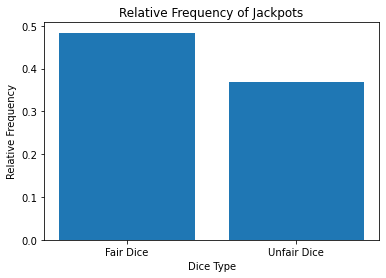

In [7]:
relative_frequencies = [relative_frequency_fair, relative_frequency_unfair]
labels = ['Fair Dice', 'Unfair Dice']

plt.bar(labels, relative_frequencies)
plt.xlabel('Dice Type')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Jackpots')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [8]:
dice_1 = Die(faces=[1, 2, 3, 4, 5, 6])
dice_2 = Die(faces=[1, 2, 3, 4, 5, 6])
dice_3 = Die(faces=[1, 2, 3, 4, 5, 6])

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [9]:
dice_1.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [10]:
dice_2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [11]:
game_fair_dice_5 = Game([dice_1, dice_2, dice_3, dice_1, dice_2])
game_fair_dice_5.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [12]:
game_unfair_dice_2 = Game([dice_1, dice_2, dice_3, dice_1, dice_2])
game_unfair_dice_2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Results:
      Die_1  Die_2  Die_3  Die_4  Die_5
0         1      6      3      6      1
1         5      2      6      3      1
2         3      1      6      6      5
3         2      2      1      3      1
4         5      1      5      6      1
...     ...    ...    ...    ...    ...
9995      6      3      5      3      1
9996      2      5      3      4      1
9997      6      4      1      1      1
9998      6      1      5      6      1
9999      4      3      2      3      1

[10000 rows x 5 columns]
Jackpot Count:
8
Results:
      Die_1  Die_2  Die_3  Die_4  Die_5
0         5      2      3      6      4
1         6      1      6      6      1
2         6      1      5      6      1
3         5      6      4      5      1
4         6      2      2      6      3
...     ...    ...    ...    ...    ...
9995      4      1      4      6      2
9996      3      2      2      1      1
9997      3      1      5      1      1
9998      5      1      4      6      5
9999      3      1 

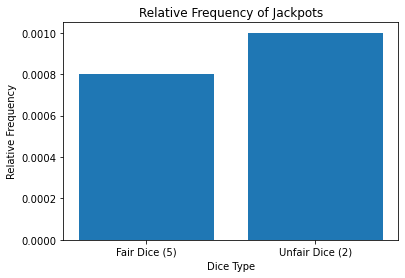

In [13]:
analyzer_fair_dice_5 = Analyzer(game_fair_dice_5)
analyzer_unfair_dice_2 = Analyzer(game_unfair_dice_2)

relative_frequency_fair_dice_5 = analyzer_fair_dice_5.jackpot() / len(game_fair_dice_5.show_results())
relative_frequency_unfair_dice_2 = analyzer_unfair_dice_2.jackpot() / len(game_unfair_dice_2.show_results())

relative_frequencies_scenario_2 = [relative_frequency_fair_dice_5, relative_frequency_unfair_dice_2]
labels_scenario_2 = ['Fair Dice (5)', 'Unfair Dice (2)']

plt.bar(labels_scenario_2, relative_frequencies_scenario_2)
plt.xlabel('Dice Type')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Jackpots')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [14]:
from montecarlo import Die
import pandas as pd

# Load frequency data from a file
frequency_data = pd.read_csv('english_letters.txt', sep=' ', header=None, names=['Letter', 'Frequency'])
frequency_weights = frequency_data['Frequency'].tolist()

# Create a die with letters and weights
alphabet_die = Die(faces=frequency_data['Letter'].tolist(), weights=frequency_weights)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [15]:
game_letter_dice_4 = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game_letter_dice_4.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [16]:
scrabble_words = set(pd.read_csv('scrabble_words.txt', header=None, squeeze=True))

# Get distinct permutations from the game results
distinct_permutations = set(''.join(row) for _, row in game_letter_dice_4.show_results().iterrows())

# Find the count of actual English words
english_words_count = len(distinct_permutations.intersection(scrabble_words))
print(english_words_count)
print(distinct_permutations)

54
{'STNE', 'ETYE', 'INBL', 'ATBH', 'RRBT', 'ARRE', 'MSAM', 'ICMP', 'AIGG', 'MFEH', 'OOTT', 'EPPS', 'NMII', 'IMCE', 'NTSA', 'LVWA', 'UCED', 'SHSD', 'KIRE', 'ISOR', 'BOTS', 'UAED', 'NSET', 'ENGR', 'DTET', 'NDFL', 'KRME', 'LRIT', 'WMIS', 'NHEP', 'AAID', 'EIAS', 'EDIA', 'TEBH', 'IDRY', 'UTRP', 'OEES', 'SEIA', 'LAII', 'ATES', 'ETNI', 'RTSW', 'HHEG', 'IPTO', 'STET', 'GRTH', 'EOIW', 'OITL', 'OAEL', 'ELTP', 'UTPA', 'EBSN', 'HSSN', 'RMIR', 'LOHR', 'HODO', 'LHOY', 'HMET', 'LXIL', 'LONA', 'NASI', 'TCES', 'SLBX', 'HOEW', 'TOIH', 'DDSS', 'AKLE', 'UTNA', 'OIWO', 'PEHI', 'WAIH', 'YELH', 'IEFR', 'MOEU', 'HEEB', 'THBG', 'ONIE', 'NHCF', 'IAAA', 'EANE', 'BEYM', 'RSFA', 'ARTH', 'ADAU', 'WSOH', 'DFKF', 'RANI', 'BTEO', 'SHAA', 'DIOT', 'YNWA', 'PCSN', 'UOTA', 'SASS', 'OERL', 'AMTH', 'EETT', 'ARTM', 'GHAO', 'RHMU', 'IAER', 'NARS', 'FEAL', 'ITEE', 'OAEO', 'HRLT', 'STNW', 'RAEA', 'EOET', 'VSMB', 'UYIO', 'ITFU', 'ATAO', 'SSDL', 'ITEP', 'BESC', 'AUUT', 'SEGY', 'RCMI', 'PTTE', 'USER', 'PRIL', 'ETHA', 'KCAT', 'ICN

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [17]:
game_letter_dice_5 = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game_letter_dice_5.play(1000)

distinct_permutations_5 = set(''.join(row) for _, row in game_letter_dice_5.show_results().iterrows())
english_words_count_5 = len(distinct_permutations_5.intersection(scrabble_words))
print(english_words_count_5)
print(distinct_permutations_5)

# Compare word counts
if english_words_count > english_words_count_5:
    print("Using 4 dice produces more English words.")
elif english_words_count < english_words_count_5:
    print("Using 5 dice produces more English words.")
else:
    print("Both scenarios produce the same number of English words.")

6
{'OOEDI', 'TESLE', 'KATNU', 'RHSRB', 'TRNTH', 'SYIOD', 'YEETI', 'ESRPE', 'NSGSS', 'OLORG', 'TIRUO', 'ARUUQ', 'APNNC', 'IMAAS', 'YITTI', 'XAIGT', 'SOEHB', 'DFWDB', 'SBNES', 'LOEEE', 'ATRDE', 'PTDNE', 'YTUPD', 'RKGLN', 'HTEOE', 'ILTTR', 'TCLTI', 'FEFAT', 'ITOOF', 'SAAIA', 'AOILN', 'EYMHM', 'VSONT', 'TATAW', 'LBEEI', 'OGUTO', 'PPDTA', 'IVOUA', 'LEMSS', 'TTIAH', 'TOEIS', 'GSOIR', 'ORITG', 'FLLEM', 'OTRNR', 'SLRES', 'SOIEO', 'MOITN', 'ADYDW', 'SSKOG', 'MARRT', 'BEPCH', 'FTATE', 'YSETT', 'OYDYN', 'MSPDL', 'ORAST', 'HNEIT', 'TCNGV', 'ENEAS', 'CHOIR', 'WTEEO', 'ISTKA', 'NCUSE', 'ERMHI', 'CUAEL', 'TDHDL', 'PLWTE', 'OSATV', 'SHSEI', 'IAWUO', 'SSTPN', 'SSAET', 'TENET', 'STOGH', 'AFOIP', 'TEUSL', 'RLIIN', 'TSEAP', 'GTORR', 'ANORR', 'SELEE', 'HEDIE', 'TWNTM', 'EOATA', 'OMEUY', 'DTEEA', 'NOHAW', 'ZEHNE', 'LDAIR', 'ELRAG', 'OSNSL', 'UNAKI', 'WLSOS', 'ONDEY', 'NATII', 'ATMTL', 'IEOUN', 'STLCL', 'SOEWT', 'KDLNI', 'AOENO', 'HNHYD', 'RTSNO', 'RHAII', 'SONRS', 'DSDRU', 'ETTDA', 'SAEEA', 'IAOTP', 'HUBNA'

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.